In [ ]:
import statsmodels.api as sm
import pandas as pd                               
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np  
from statsmodels.formula.api import logit, glm, ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import chi2
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files          #load the file
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
heart = pd.read_csv('heart.csv')         #read the file

#Benchmark

In [ ]:
heart = heart.drop(['thalach','slope'], axis=1)

In [ ]:
# seperate predictor and response variable
x = heart.drop(['target'], axis=1)  
y = heart['target'] 

In [ ]:
#split the data with test = 30%   train = 70%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30) 

In [ ]:
# IMPLEMENTING DECISION TREE
model = DecisionTreeClassifier(criterion='entropy')

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[152   4]
 [  3 149]]


Accuracy of Decision Tree: 97.72727272727273 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       156
           1       0.97      0.98      0.98       152

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[74 26]
 [10 95]]


Accuracy of Logistic Regression: 82.4390243902439 

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       100
           1       0.79      0.90      0.84       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [ ]:
# IMPLEMENTING KNN 
model = KNeighborsClassifier()

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[74 26]
 [35 70]]


Accuracy of KNN: 70.24390243902438 

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       100
           1       0.73      0.67      0.70       105

    accuracy                           0.70       205
   macro avg       0.70      0.70      0.70       205
weighted avg       0.70      0.70      0.70       205



In [ ]:
# IMPLEMENTING NAIVE BAYES 
model = GaussianNB()

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[74 26]
 [ 9 96]]


Accuracy of Decision Tree: 82.92682926829268 

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       100
           1       0.79      0.91      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



#Discretization with Grid Search

In [ ]:
# Bin age, trestbps, chol, thalach, oldpeak
# qcut divides the bins so that each bin aprx has the same number of instances

heart['age'] = pd.qcut(heart['age'], q=4)
heart['trestbps'] = pd.qcut(heart['trestbps'], q=4)
heart['chol'] = pd.qcut(heart['chol'], q=4)
#heart['thalach'] = pd.qcut(heart['thalach'], q=4)
heart['oldpeak'] = pd.qcut(heart['oldpeak'], q=2)

In [ ]:
#convert from interval to ordinal
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

encoded_age = le.fit_transform(heart['age'])
heart['age'] = encoded_age

encoded_trest = le.fit_transform(heart['trestbps'])
heart['trestbps'] = encoded_trest

encoded_chol = le.fit_transform(heart['chol'])
heart['chol'] = encoded_chol

#encoded_thalach = le.fit_transform(heart['thalach'])
#heart['thalach'] = encoded_thalach

encoded_old = le.fit_transform(heart['oldpeak'])
heart['oldpeak'] = encoded_old

In [ ]:
# seperate predictor and response variable
x = heart.drop(['target'], axis=1)  
y = heart['target'] 

#split the data with test = 30%   train = 70%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)

# optimize size of penalty
param_grid = {'C' : np.logspace(-4, 4, 20)}

search = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, refit=True)
fit_model = search.fit(X_train, y_train)                                      
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression: ", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[119  35]
 [ 23 131]]


Accuracy of Logistic Regression:  81.16883116883116 

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       154
           1       0.79      0.85      0.82       154

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308

best params:  {'C': 0.615848211066026}


In [ ]:
# IMPLEMENTING DECISION TREE
model = DecisionTreeClassifier(criterion='entropy')

max_depth = range(1, 11, 2) # odd numbers for max depth
param_grid = dict(max_depth=max_depth)                                                           
search = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, refit=True)
fit_model = search.fit(X_train, y_train)                                      
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best max depth: ', fit_model.best_params_)

confusion matrix
[[154   0]
 [  7 147]]


Accuracy of Decision Tree Classifier: 97.72727272727273 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       1.00      0.95      0.98       154

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

best max depth:  {'max_depth': 9}


In [ ]:
# IMPLEMENTING KNN
model = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)
  
# fitting the model for grid search
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best k neighbors: ', fit_model.best_params_)

confusion matrix
[[144   8]
 [  6 150]]


Accuracy of KNN Classifier: 95.45454545454545 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       152
           1       0.95      0.96      0.96       156

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

best k neighbors:  {'n_neighbors': 1}


In [ ]:
# IMPLEMENTING NAIVE BAYES
model = GaussianNB()

# solves the zero probability problem
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# defining parameter range
search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)
  
# fitting the model for grid search
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[118  36]
 [ 18 136]]


Accuracy of Naive Bayes: 82.46753246753246 

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       154
           1       0.79      0.88      0.83       154

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308

best params:  {'var_smoothing': 0.0533669923120631}


#Feature Selection with Gridsearch

In [ ]:
# LOGISTIC
pipe=make_pipeline(SelectKBest(score_func=chi2), LogisticRegression(max_iter=1000))
params={'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit=True)

# fitting the model for grid search
fit_model = search.fit(X_train,y_train)

In [ ]:
# Know what number of features to use
fit_model.best_params_

{'selectkbest__k': 6}

In [ ]:
# DECISION TREE
pipe=make_pipeline(SelectKBest(score_func=chi2), DecisionTreeClassifier(criterion='entropy'))
params={'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit=True)

# fitting the model for grid search
fit_model = search.fit(X_train,y_train)

# Know what number of features to use
fit_model.best_params_

{'selectkbest__k': 6}

In [ ]:
# KNN
pipe=make_pipeline(SelectKBest(score_func=chi2), KNeighborsClassifier())
params={'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit=True)

# fitting the model for grid search
fit_model = search.fit(X_train,y_train)

fit_model.best_params_

{'selectkbest__k': 6}

In [ ]:
# NAIVE BAYES
pipe=make_pipeline(SelectKBest(score_func=chi2), GaussianNB())
params={'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit=True)

# fitting the model for grid search
fit_model = search.fit(X_train,y_train)

fit_model.best_params_

{'selectkbest__k': 6}

###Extracting top 6 features

In [ ]:
 #extracting top 6 features
best_features = SelectKBest(score_func=chi2, k=6)     
fit = best_features.fit(X_train,y_train)

#see what columns are selected and their scores
filter = best_features.get_support()                 
cols = X_train.columns
col = cols[filter]
score = fit.scores_[filter]

In [ ]:
# Create df to view selected attributes and scores
# Higher chi2 means 2 attribtes are dependent which is good for classification
dictt = {}                 
for i in range(len(col)):
  dictt[col[i]] = score[i]

pdd = pd.DataFrame()
pdd['Attributes'] = dictt.keys()
pdd['Chi2 Scores'] = dictt.values()

pdd_sort = pdd.sort_values(by=['Chi2 Scores'], ascending=False)

pdp = pdd_sort.set_index('Attributes')
chi_scores = pdp.reset_index()
chi_scores

Attributes  Chi2 Scores
0         ca   152.689923
1         cp   118.321953
2      exang    82.626996
3    oldpeak    62.765684
4        age    35.713800
5        sex    18.777302

In [ ]:
# seperate predictor and response variable
x = heart[['ca','cp','exang','oldpeak','age','sex']] 
y = heart['target'] 

#split the data with test = 30%   train = 70%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)

# optimize size of penalty
param_grid = {'C' : np.logspace(-4, 4, 20)}

search = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, refit=True)
fit_model = search.fit(X_train, y_train)                                      
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression: ", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[125  28]
 [ 22 133]]


Accuracy of Logistic Regression:  83.76623376623377 

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       153
           1       0.83      0.86      0.84       155

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

best params:  {'C': 0.615848211066026}


In [ ]:
# IMPLEMENTING DECISION TREE
model = DecisionTreeClassifier(criterion='entropy')

max_depth = range(1, 11, 2) # odd numbers for max depth
param_grid = dict(max_depth=max_depth)                                                           
search = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, refit=True)
fit_model = search.fit(X_train, y_train)                                      
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best max depth: ', fit_model.best_params_)

confusion matrix
[[140  13]
 [  3 152]]


Accuracy of Decision Tree Classifier: 94.8051948051948 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       153
           1       0.92      0.98      0.95       155

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

best max depth:  {'max_depth': 9}


In [ ]:
# IMPLEMENTING KNN
model = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)
  
# fitting the model for grid search
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best k neighbors: ', fit_model.best_params_)

confusion matrix
[[145   8]
 [  3 152]]


Accuracy of KNN Classifier: 96.42857142857143 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       153
           1       0.95      0.98      0.97       155

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

best k neighbors:  {'n_neighbors': 1}


In [ ]:
# IMPLEMENTING NAIVE BAYES
model = GaussianNB()

# solves the zero probability problem
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# defining parameter range
search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)
  
# fitting the model for grid search
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[120  33]
 [ 14 141]]


Accuracy of Naive Bayes: 84.74025974025975 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       153
           1       0.81      0.91      0.86       155

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

best params:  {'var_smoothing': 0.002848035868435802}


#Confusion Matrix

[[140  13]
 [  3 152]]


In [ ]:
con_matrix_pred = np.array([[140,13],[3,152]])
con_matrix_pred

array([[140,  13],
       [  3, 152]])

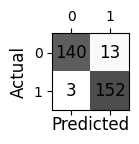

In [ ]:
 #visualize confusion matrix
plt.style.use('default')
fig, ax = plt.subplots(figsize=(1, 1))                     
ax.matshow(con_matrix_pred, cmap=plt.cm.Greys, alpha=0.7)
for i in range(con_matrix_pred.shape[0]):
    for j in range(con_matrix_pred.shape[1]):
        ax.text(x=j, y=i,s=con_matrix_pred[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
#plt.title('Confusion Matrix', fontsize=12)
plt.show()